In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df = pd.read_csv("Assignment_1_data.csv")
df.head()

,gender,age,heart_rate_min,heart_rate_max,heart_rate_mean,mbp_min,mbp_max,mbp_mean,sbp_min,sbp_max,...,bilirubin_indirect_min,urineoutput,sofa_respiration,sofa_coagulation,sofa_liver,sofa_cardiovascular,sofa_cns,sofa_renal,charlson_comorbidity_index,outcome
0,M,54.550390,93.0,115.0,103.500000,57.0,100.0,82.733333,87.0,163.0,...,NaN,3459.0,2.0,0.0,NaN,1.0,0.0,1.0,3,False
1,M,86.324653,50.0,61.0,54.333333,61.0,93.0,71.695652,95.0,141.0,...,NaN,2020.0,NaN,1.0,NaN,1.0,1.0,1.0,8,False
2,M,40.270146,70.0,105.0,83.434783,66.0,92.0,76.695652,94.0,129.0,...,NaN,3050.0,NaN,1.0,0.0,1.0,1.0,0.0,4,False
3,M,73.383547,68.0,98.0,83.880000,74.0,101.0,84.694444,83.0,148.0,...,NaN,1592.0,NaN,0.0,NaN,0.0,0.0,1.0,6,False
4,M,70.724748,77.0,95.0,85.771429,30.0,90.0,62.657143,52.0,129.0,...,NaN,339.0,2.0,0.0,0.0,4.0,1.0,3.0,10,False


In [2]:
df.shape

(36489, 60)

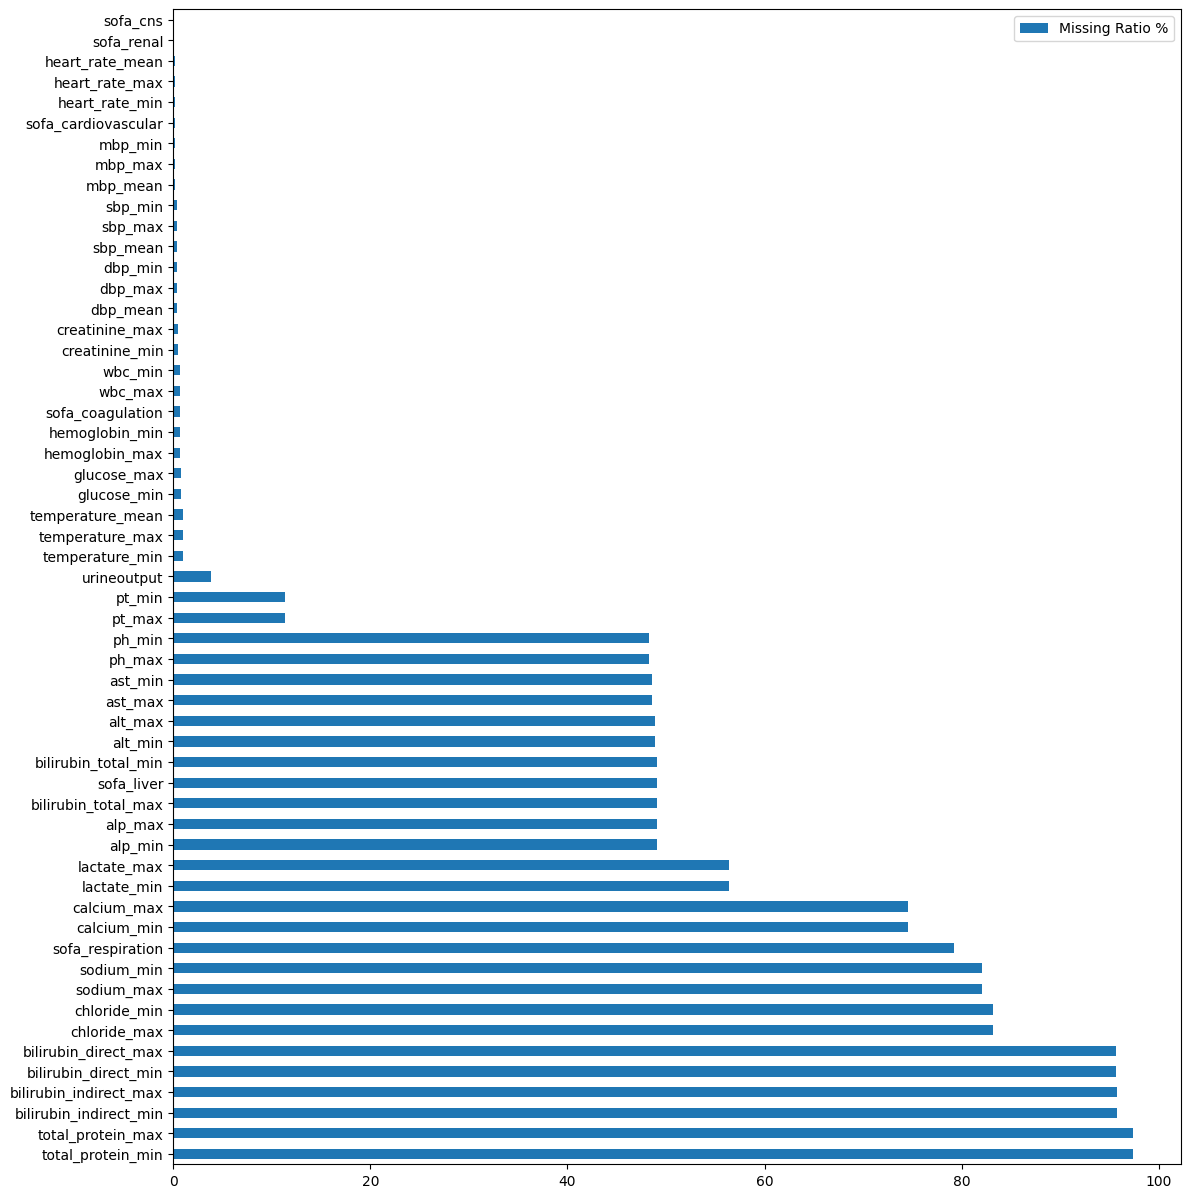

In [4]:
#Plot missing values

import matplotlib.pyplot as plt
def plot_nas(df: pd.DataFrame):
    if df.isnull().sum().sum() != 0:
        na_df = (df.isnull().sum() / len(df)) * 100      
        na_df = na_df.drop(na_df[na_df == 0].index).sort_values(ascending=False)
        missing_data = pd.DataFrame({'Missing Ratio %' :na_df})
        missing_data.plot(kind = "barh")
        plt.show()
    else:
        print('No NAs found')
plot_nas(df)
plot_width, plot_height = (15,15)
plt.rcParams['figure.figsize'] = (plot_width,plot_height)

## Handling Missing Values

In [5]:
#dropping variables with more than 40% missing values

perc = 40.0 # Like N %
min_count =  int(((100-perc)/100)*df.shape[0] + 1)
newdf = df.dropna( axis=1, 
                thresh=min_count) 

In [6]:
newdf.shape

(36489, 34)

In [7]:
#current missing values
newdf.isnull().sum()

gender                           0
age                              0
heart_rate_min                  72
heart_rate_max                  72
heart_rate_mean                 72
mbp_min                         88
mbp_max                         88
mbp_mean                        88
sbp_min                        146
sbp_max                        146
sbp_mean                       146
dbp_min                        148
dbp_max                        148
dbp_mean                       148
temperature_min                363
temperature_max                363
temperature_mean               363
glucose_min                    298
glucose_max                    298
wbc_min                        254
wbc_max                        254
creatinine_min                 198
creatinine_max                 198
hemoglobin_min                 257
hemoglobin_max                 257
pt_min                        4144
pt_max                        4144
urineoutput                   1416
sofa_coagulation    

In [8]:
##Selecting numerical features
numerical_data = newdf.select_dtypes(include='number')
numerical_features=numerical_data.columns.tolist()

print(f'There are {len(numerical_features)} numerical features:', '\n')
print(numerical_features)

There are 32 numerical features: 

['age', 'heart_rate_min', 'heart_rate_max', 'heart_rate_mean', 'mbp_min', 'mbp_max', 'mbp_mean', 'sbp_min', 'sbp_max', 'sbp_mean', 'dbp_min', 'dbp_max', 'dbp_mean', 'temperature_min', 'temperature_max', 'temperature_mean', 'glucose_min', 'glucose_max', 'wbc_min', 'wbc_max', 'creatinine_min', 'creatinine_max', 'hemoglobin_min', 'hemoglobin_max', 'pt_min', 'pt_max', 'urineoutput', 'sofa_coagulation', 'sofa_cardiovascular', 'sofa_cns', 'sofa_renal', 'charlson_comorbidity_index']


In [9]:
#Selecting categoricalfeatures
categorical_data=newdf.select_dtypes(include= ('object','bool'))
categorical_features=categorical_data.columns.tolist()

print(f'There are {len(categorical_features)} numerical features:', '\n')
print(categorical_features)

There are 2 numerical features: 

['gender', 'outcome']


In [ ]:
#plot imbalance for outcome 

#### To fill these Nan values in remaining data, distribution needs to be understood

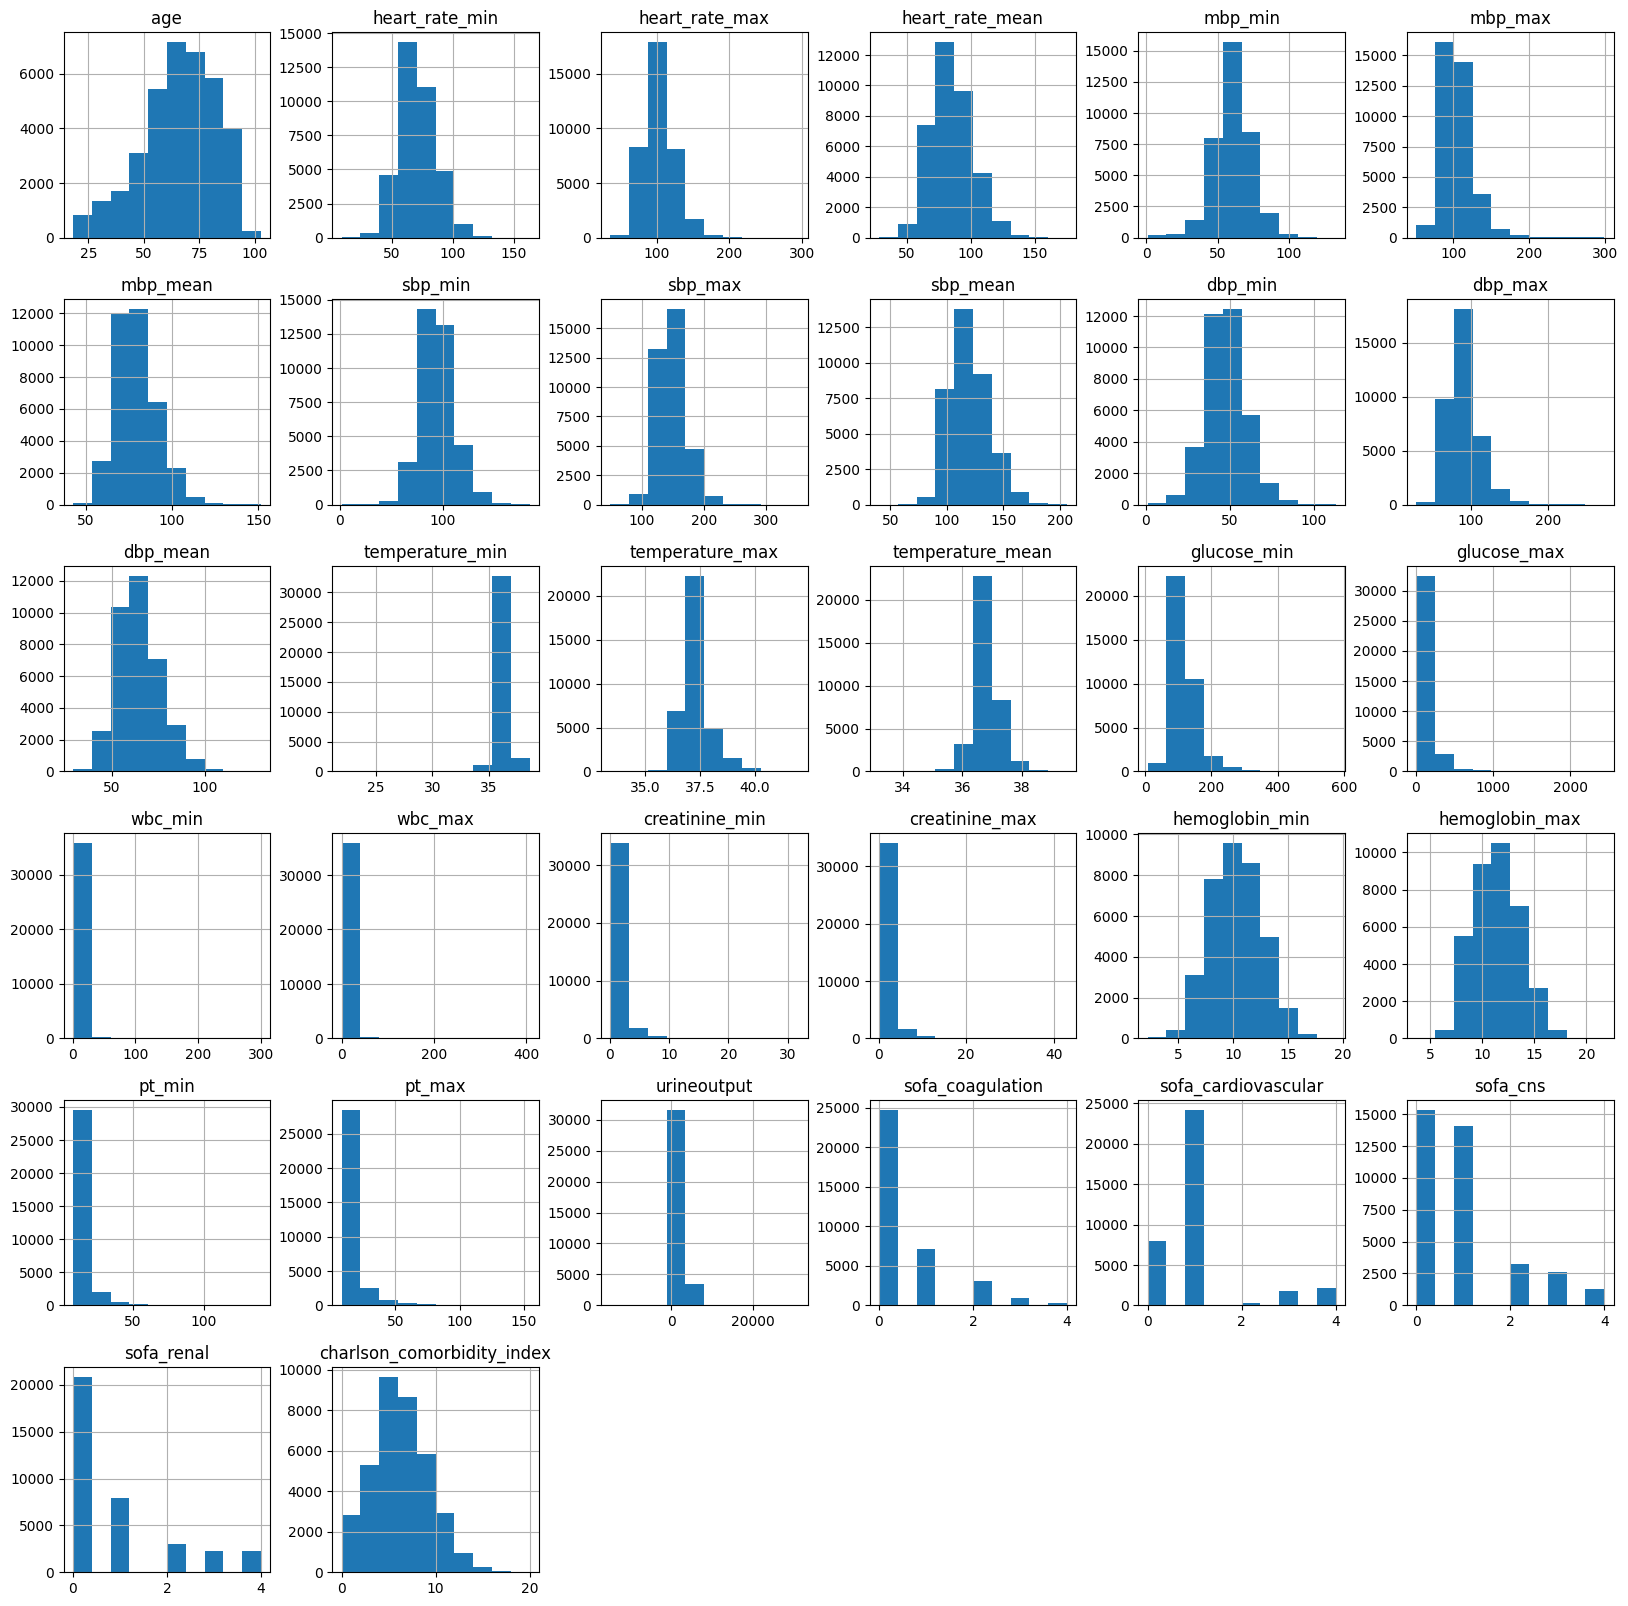

In [11]:
p = newdf.hist(figsize = (20,20))

In [12]:
newdf_copy = newdf.copy(deep = True)

newdf_copy['outcome'] = newdf_copy['outcome'].map({True: 1, False: 0})
newdf_copy['gender'] = newdf_copy['gender'].map({"M": 1, "F": 0})


In [13]:
newdf_copy['heart_rate_min'].fillna(newdf_copy['heart_rate_min'].mean(), inplace = True)
newdf_copy['heart_rate_mean'].fillna(newdf_copy['heart_rate_mean'].mean(), inplace = True)
newdf_copy['heart_rate_max'].fillna(newdf_copy['heart_rate_max'].mean(), inplace = True)
newdf_copy['mbp_min'].fillna(newdf_copy['mbp_min'].mean(), inplace = True)
newdf_copy['mbp_max'].fillna(newdf_copy['mbp_max'].mean(), inplace = True)
newdf_copy['mbp_mean'].fillna(newdf_copy['mbp_mean'].mean(), inplace = True)
newdf_copy["sbp_min"].fillna(newdf_copy["sbp_min"].mean(), inplace = True)
newdf_copy["sbp_max"].fillna(newdf_copy["sbp_max"].mean(), inplace = True)
newdf_copy["sbp_mean"].fillna(newdf_copy["sbp_mean"].mean(), inplace = True)
newdf_copy["dbp_max"].fillna(newdf_copy["dbp_max"].mean(), inplace = True)
newdf_copy["dbp_min"].fillna(newdf_copy["dbp_min"].mean(), inplace = True)
newdf_copy["dbp_mean"].fillna(newdf_copy["dbp_mean"].mean(), inplace = True)
newdf_copy["temperature_min"].fillna(newdf_copy["temperature_min"].median(), inplace = True)
newdf_copy["temperature_max"].fillna(newdf_copy["temperature_max"].mean(), inplace = True)
newdf_copy["temperature_mean"].fillna(newdf_copy["temperature_mean"].median(), inplace = True)
newdf_copy["glucose_min"].fillna(newdf_copy["glucose_min"].mean(), inplace = True)
newdf_copy["glucose_max"].fillna(newdf_copy["glucose_max"].median(), inplace = True)
newdf_copy["wbc_min"].fillna(newdf_copy["wbc_min"].median(), inplace = True)
newdf_copy["wbc_max"].fillna(newdf_copy["wbc_max"].median(), inplace = True)
newdf_copy["creatinine_min"].fillna(newdf_copy["creatinine_min"].median(), inplace = True)
newdf_copy["creatinine_max"].fillna(newdf_copy["creatinine_max"].median(), inplace = True)
newdf_copy["hemoglobin_min"].fillna(newdf_copy["hemoglobin_min"].mean(), inplace = True)
newdf_copy["hemoglobin_max"].fillna(newdf_copy["hemoglobin_max"].mean(), inplace = True)
newdf_copy["hemoglobin_max"].fillna(newdf_copy["hemoglobin_max"].mean(), inplace = True)
newdf_copy["hemoglobin_max"].fillna(newdf_copy["hemoglobin_max"].mean(), inplace = True)
newdf_copy["hemoglobin_max"].fillna(newdf_copy["hemoglobin_max"].mean(), inplace = True)
newdf_copy["pt_min"].fillna(newdf_copy["pt_min"].median(), inplace = True)
newdf_copy["pt_max"].fillna(newdf_copy["pt_max"].median(), inplace = True)
newdf_copy["urineoutput"].fillna(newdf_copy["urineoutput"].median(), inplace = True)
print(newdf_copy.isnull().sum())

gender                          0
age                             0
heart_rate_min                  0
heart_rate_max                  0
heart_rate_mean                 0
mbp_min                         0
mbp_max                         0
mbp_mean                        0
sbp_min                         0
sbp_max                         0
sbp_mean                        0
dbp_min                         0
dbp_max                         0
dbp_mean                        0
temperature_min                 0
temperature_max                 0
temperature_mean                0
glucose_min                     0
glucose_max                     0
wbc_min                         0
wbc_max                         0
creatinine_min                  0
creatinine_max                  0
hemoglobin_min                  0
hemoglobin_max                  0
pt_min                          0
pt_max                          0
urineoutput                     0
sofa_coagulation              254
sofa_cardiovas

In [14]:
newdf_copy["sofa_coagulation"].fillna(0.0, inplace = True)
newdf_copy["sofa_cardiovascular"].fillna(1.0, inplace = True)
newdf_copy["sofa_cns"].fillna(0.0, inplace = True)
newdf_copy["sofa_renal"].fillna(0.0, inplace = True)
print(newdf_copy.isnull().sum())

gender                        0
age                           0
heart_rate_min                0
heart_rate_max                0
heart_rate_mean               0
mbp_min                       0
mbp_max                       0
mbp_mean                      0
sbp_min                       0
sbp_max                       0
sbp_mean                      0
dbp_min                       0
dbp_max                       0
dbp_mean                      0
temperature_min               0
temperature_max               0
temperature_mean              0
glucose_min                   0
glucose_max                   0
wbc_min                       0
wbc_max                       0
creatinine_min                0
creatinine_max                0
hemoglobin_min                0
hemoglobin_max                0
pt_min                        0
pt_max                        0
urineoutput                   0
sofa_coagulation              0
sofa_cardiovascular           0
sofa_cns                      0
sofa_ren

In [15]:
newdf_copy.shape

(36489, 34)

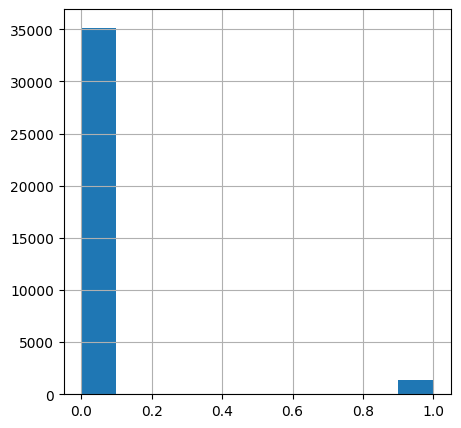

In [21]:
p = newdf_copy['outcome'].hist(figsize = (5,5))
#highly imbalanced target class

In [24]:
X=newdf_copy.drop("outcome",axis=1)
y=newdf_copy.outcome

## Feature Selection



### Filter Methods

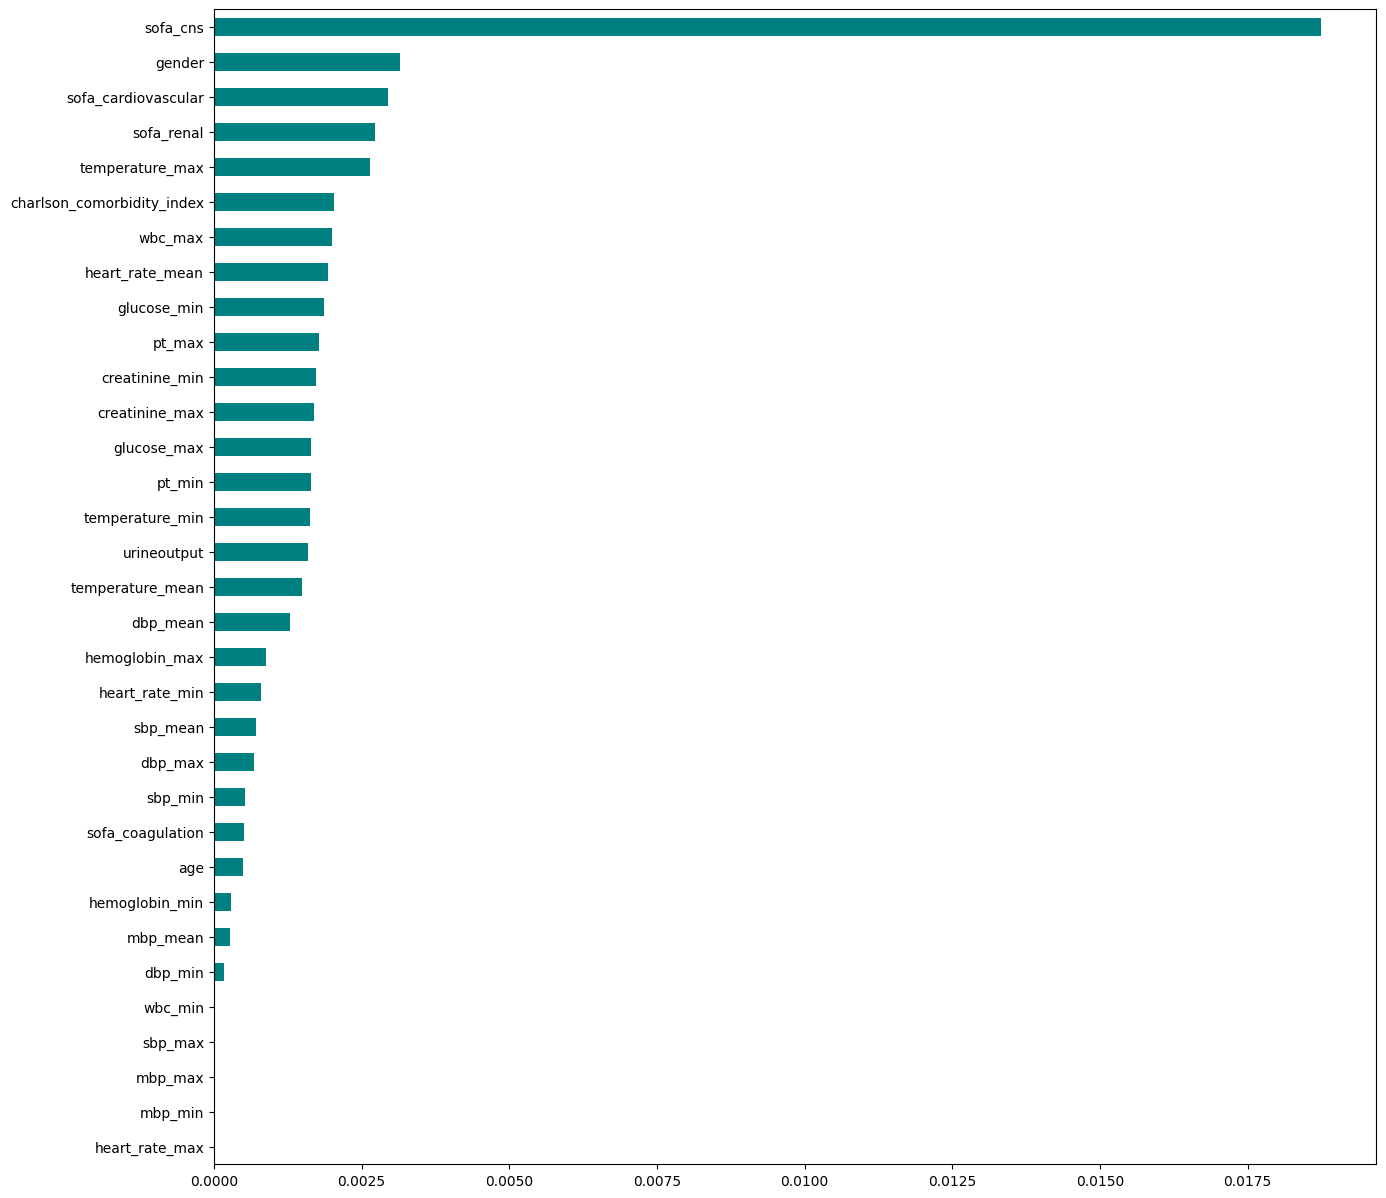

In [25]:
#Information Gain

from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
%matplotlib inline

importances = mutual_info_classif(X,y)
feat_impts= pd.Series(importances, newdf_copy.columns[0:len(newdf_copy.columns)-1])
feat_impts.sort_values( ascending=True).plot(kind='barh', color='teal')
plt.show()

In [23]:
feat_impts.sort_values( ascending=True)
igls=[]
for item in feat_impts.index:
    if feat_impts[item] != 0:
        igls.append(item)
        
igls

['gender',
 'age',
 'heart_rate_min',
 'heart_rate_max',
 'heart_rate_mean',
 'mbp_min',
 'mbp_max',
 'mbp_mean',
 'sbp_min',
 'sbp_mean',
 'dbp_min',
 'dbp_max',
 'dbp_mean',
 'temperature_min',
 'temperature_max',
 'temperature_mean',
 'glucose_min',
 'glucose_max',
 'wbc_min',
 'wbc_max',
 'creatinine_min',
 'creatinine_max',
 'hemoglobin_min',
 'hemoglobin_max',
 'pt_min',
 'urineoutput',
 'sofa_coagulation',
 'sofa_cardiovascular',
 'sofa_cns',
 'sofa_renal',
 'charlson_comorbidity_index']

### Embedded Methods

In [27]:
#Lasso Reg
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
reg = LassoCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Best alpha using built-in LassoCV: 0.009571
Best score using built-in LassoCV: 0.045562
Lasso picked 16 variables and eliminated the other 17 variables


In [28]:
lassols=[]
for item in coef.index:
    if coef[item] != 0:
        lassols.append(item)
lassols       

['age',
 'heart_rate_min',
 'heart_rate_max',
 'mbp_min',
 'mbp_max',
 'sbp_min',
 'sbp_max',
 'sbp_mean',
 'dbp_max',
 'dbp_mean',
 'glucose_min',
 'glucose_max',
 'wbc_max',
 'pt_max',
 'urineoutput',
 'sofa_cns']

Text(0.5, 1.0, 'Feature importance using Lasso Model')

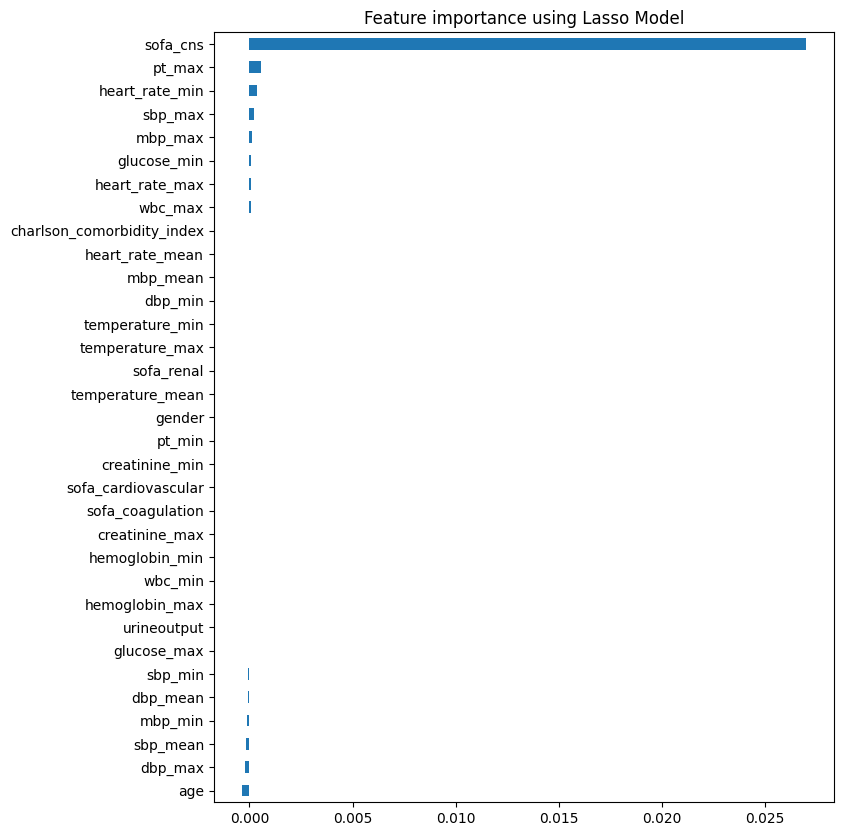

In [29]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

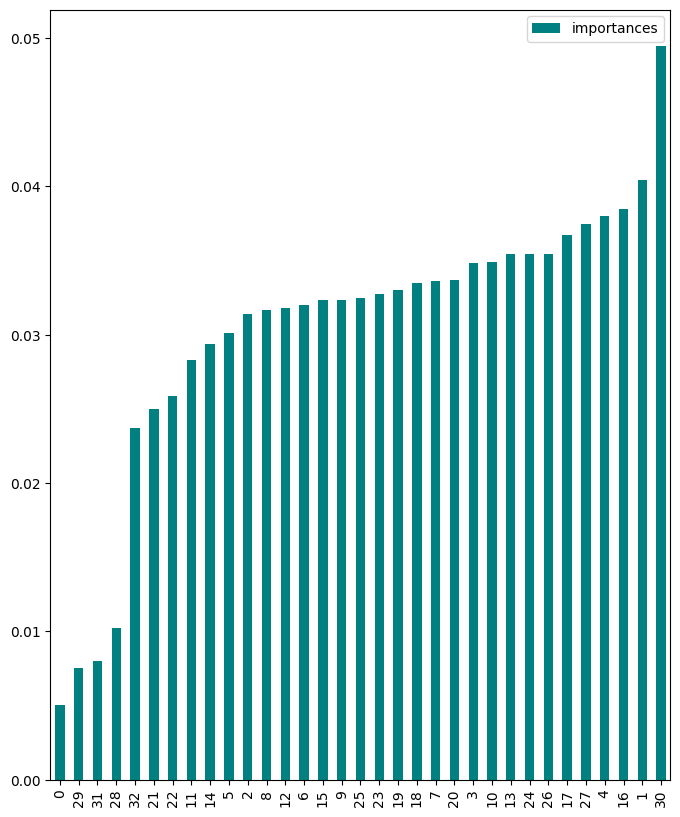

In [30]:
# Random Forest importance

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators =340)
model.fit(X,y)
importances = model.feature_importances_

final_df = pd.DataFrame({"Features": pd.DataFrame(X).columns, "importances": importances})
final_df = final_df.sort_values("importances")
final_df.plot.bar(color = "teal")
rfls=list(final_df["Features"].tail(24))

In [31]:
rfls

['mbp_min',
 'heart_rate_min',
 'sbp_min',
 'dbp_max',
 'mbp_max',
 'temperature_max',
 'sbp_max',
 'pt_min',
 'hemoglobin_min',
 'wbc_min',
 'glucose_max',
 'mbp_mean',
 'wbc_max',
 'heart_rate_max',
 'sbp_mean',
 'dbp_mean',
 'hemoglobin_max',
 'pt_max',
 'glucose_min',
 'urineoutput',
 'heart_rate_mean',
 'temperature_mean',
 'age',
 'sofa_cns']

# Model Building

In [60]:
X=newdf_copy[lassols]

In [61]:
X.shape

(36489, 16)

In [62]:
y.shape

(36489,)

In [63]:
from sklearn.model_selection import train_test_split #%80
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8)

In [64]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(29191, 16)
(7298, 16)
(29191,)
(7298,)


## Baseline

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import KFold
import numpy as np
from sklearn.model_selection import GridSearchCV


classifiers = [
    LogisticRegression(),
    #KNeighborsClassifier(3),
    #SVC(kernel="linear", C=0.025),
    #DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    AdaBoostClassifier(),
    GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)

]


for clf in classifiers:
    
    model= clf.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    #print(confusion_matrix(y_test,y_pred))
    print("This is " + str(clf))
    df = pd.DataFrame(classification_report(y_test, 
                                        y_pred, digits=2,
                                        output_dict=True)).T
    df['support'] = df.support.apply(int)

    df.style.background_gradient(cmap='viridis',
                             subset=pd.IndexSlice['0':'9', :'f1-score'])
    display(df)

This is LogisticRegression()


C:\Users\priya\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,precision,recall,f1-score,support
0,0.963958,0.999858,0.981580,7035
1,0.000000,0.000000,0.000000,263
accuracy,0.963826,0.963826,0.963826,0
macro avg,0.481979,0.499929,0.490790,7298
weighted avg,0.929219,0.963826,0.946206,7298


This is RandomForestClassifier(max_depth=5, max_features=1, n_estimators=10)


C:\Users\priya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\priya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\priya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,precision,recall,f1-score,support
0,0.963963,1.000000,0.981651,7035
1,0.000000,0.000000,0.000000,263
accuracy,0.963963,0.963963,0.963963,0
macro avg,0.481981,0.500000,0.490825,7298
weighted avg,0.929224,0.963963,0.946275,7298


This is AdaBoostClassifier()


,precision,recall,f1-score,support
0,0.964335,0.999289,0.981501,7035
1,0.375000,0.011407,0.022140,263
accuracy,0.963689,0.963689,0.963689,0
macro avg,0.669667,0.505348,0.501821,7298
weighted avg,0.943097,0.963689,0.946928,7298


This is GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=0)


,precision,recall,f1-score,support
0,0.964727,0.999147,0.981635,7035
1,0.500000,0.022814,0.043636,263
accuracy,0.963963,0.963963,0.963963,0
macro avg,0.732363,0.510980,0.512636,7298
weighted avg,0.947979,0.963963,0.947832,7298


## UnderSampling

In [66]:
import imblearn
from collections import Counter
Counter(y_train)
from collections import Counter
from imblearn.under_sampling import NearMiss
ns=NearMiss()
#ns=NearMiss()
X_train_ns,y_train_ns=ns.fit_resample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

The number of classes before fit Counter({0: 28125, 1: 1066})
The number of classes after fit Counter({0: 1066, 1: 1066})


In [67]:
classifiers = [
    LogisticRegression(),
    #KNeighborsClassifier(3),
    #SVC(kernel="linear", C=0.025),
    #DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    AdaBoostClassifier(),
    GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)

]


for clf in classifiers:
    model= clf.fit(X_train_ns,y_train_ns)
    y_pred=model.predict(X_test)
    print("This is " + str(clf))
    df = pd.DataFrame(classification_report(y_test, 
                                        y_pred, digits=2,
                                        output_dict=True)).T
    df['support'] = df.support.apply(int)

    df.style.background_gradient(cmap='viridis',
                             subset=pd.IndexSlice['0':'9', :'f1-score'])
    display(df)

This is LogisticRegression()


C:\Users\priya\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,precision,recall,f1-score,support
0,0.979067,0.465387,0.630889,7035
1,0.048811,0.733840,0.091534,263
accuracy,0.475062,0.475062,0.475062,0
macro avg,0.513939,0.599614,0.361212,7298
weighted avg,0.945543,0.475062,0.611452,7298


This is RandomForestClassifier(max_depth=5, max_features=1, n_estimators=10)


,precision,recall,f1-score,support
0,0.974614,0.403838,0.571055,7035
1,0.043121,0.718631,0.081360,263
accuracy,0.415182,0.415182,0.415182,0
macro avg,0.508868,0.561235,0.326208,7298
weighted avg,0.941046,0.415182,0.553408,7298


This is AdaBoostClassifier()


,precision,recall,f1-score,support
0,0.981873,0.277186,0.432325,7035
1,0.042733,0.863118,0.081435,263
accuracy,0.298301,0.298301,0.298301,0
macro avg,0.512303,0.570152,0.256880,7298
weighted avg,0.948029,0.298301,0.419679,7298


This is GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=0)


,precision,recall,f1-score,support
0,0.979743,0.281876,0.437797,7035
1,0.042093,0.844106,0.080188,263
accuracy,0.302138,0.302138,0.302138,0
macro avg,0.510918,0.562991,0.258992,7298
weighted avg,0.945953,0.302138,0.424909,7298


## Oversampling

In [68]:
from imblearn.over_sampling import RandomOverSampler
#os=RandomOverSampler(sampling_strategy=0.75)
os=RandomOverSampler()
X_train_ns,y_train_ns=os.fit_resample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

The number of classes before fit Counter({0: 28125, 1: 1066})
The number of classes after fit Counter({0: 28125, 1: 28125})


In [69]:
for clf in classifiers:
    model= clf.fit(X_train_ns,y_train_ns)
    y_pred=model.predict(X_test)
    print("This is " + str(clf))
    df = pd.DataFrame(classification_report(y_test, 
                                        y_pred, digits=2,
                                        output_dict=True)).T
    df['support'] = df.support.apply(int)

    df.style.background_gradient(cmap='viridis',
                             subset=pd.IndexSlice['0':'9', :'f1-score'])
    display(df)

This is LogisticRegression()


C:\Users\priya\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,precision,recall,f1-score,support
0,0.975130,0.640938,0.773480,7035
1,0.055348,0.562738,0.100783,263
accuracy,0.638120,0.638120,0.638120,0
macro avg,0.515239,0.601838,0.437131,7298
weighted avg,0.941983,0.638120,0.749238,7298


This is RandomForestClassifier(max_depth=5, max_features=1, n_estimators=10)


,precision,recall,f1-score,support
0,0.975251,0.744989,0.844709,7035
1,0.067568,0.494297,0.118884,263
accuracy,0.735955,0.735955,0.735955,0
macro avg,0.521409,0.619643,0.481797,7298
weighted avg,0.942541,0.735955,0.818553,7298


This is AdaBoostClassifier()


,precision,recall,f1-score,support
0,0.983530,0.780952,0.870612,7035
1,0.099883,0.650190,0.173165,263
accuracy,0.776240,0.776240,0.776240,0
macro avg,0.541707,0.715571,0.521889,7298
weighted avg,0.951686,0.776240,0.845478,7298


This is GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=0)


,precision,recall,f1-score,support
0,0.983577,0.774698,0.866730,7035
1,0.097894,0.653992,0.170297,263
accuracy,0.770348,0.770348,0.770348,0
macro avg,0.540736,0.714345,0.518514,7298
weighted avg,0.951659,0.770348,0.841633,7298


## SMOTE

In [70]:
from imblearn.over_sampling import SMOTE
os=SMOTE(random_state=42)
X_train_ns,y_train_ns=os.fit_resample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

The number of classes before fit Counter({0: 28125, 1: 1066})
The number of classes after fit Counter({0: 28125, 1: 28125})


In [71]:
for clf in classifiers:
    model= clf.fit(X_train_ns,y_train_ns)
    y_pred=model.predict(X_test)
    print("This is " + str(clf))
    df = pd.DataFrame(classification_report(y_test, 
                                        y_pred, digits=2,
                                        output_dict=True)).T
    df['support'] = df.support.apply(int)

    df.style.background_gradient(cmap='viridis',
                             subset=pd.IndexSlice['0':'9', :'f1-score'])
    display(df)

This is LogisticRegression()


C:\Users\priya\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,precision,recall,f1-score,support
0,0.975679,0.632978,0.767825,7035
1,0.055596,0.577947,0.101435,263
accuracy,0.630995,0.630995,0.630995,0
macro avg,0.515638,0.605462,0.434630,7298
weighted avg,0.942522,0.630995,0.743810,7298


This is RandomForestClassifier(max_depth=5, max_features=1, n_estimators=10)


,precision,recall,f1-score,support
0,0.977615,0.738735,0.841551,7035
1,0.072654,0.547529,0.128285,263
accuracy,0.731844,0.731844,0.731844,0
macro avg,0.525134,0.643132,0.484918,7298
weighted avg,0.945002,0.731844,0.815847,7298


This is AdaBoostClassifier()


,precision,recall,f1-score,support
0,0.975989,0.901350,0.937186,7035
1,0.133583,0.406844,0.201128,263
accuracy,0.883530,0.883530,0.883530,0
macro avg,0.554786,0.654097,0.569157,7298
weighted avg,0.945631,0.883530,0.910660,7298


This is GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=0)


,precision,recall,f1-score,support
0,0.972038,0.938877,0.955170,7035
1,0.145129,0.277567,0.190601,263
accuracy,0.915045,0.915045,0.915045,0
macro avg,0.558584,0.608222,0.572885,7298
weighted avg,0.942239,0.915045,0.927617,7298
